In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
# df.info()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

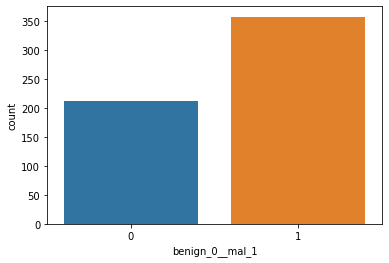

In [4]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

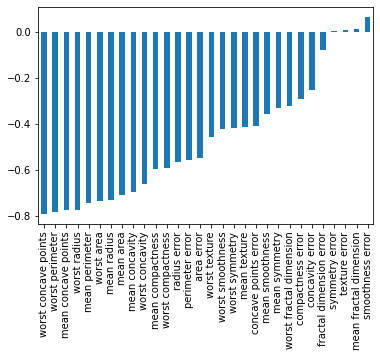

In [5]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

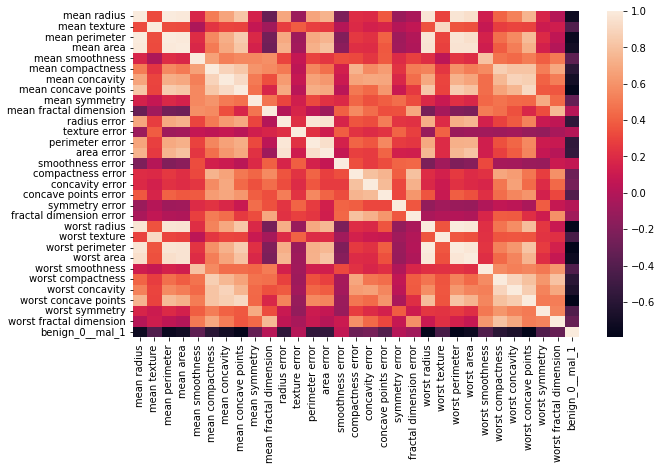

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [7]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train = scaler.fit_transform(X_train)

In [13]:
X_test = scaler.fit_transform(X_test)

### Prevent OverFitting

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense,Dropout

In [16]:
X_train.shape

(426, 30)

In [17]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))


#BINARY CLASSIFICATION BECAUSE BENIGN CAN ONLY BE 0 OR 1
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
model.fit(x=X_train,y=y_train, epochs=600,
         validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6978 - val_loss: 0.6671
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6386 - val_loss: 0.6101
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5945 - val_loss: 0.5664
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5513 - val_loss: 0.5246
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5128 - val_loss: 0.4808
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4706 - val_loss: 0.4321
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4275 - val_loss: 0.3930
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3871 - val_loss: 0.3538
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3504 - val_loss: 0.3195
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3179 - val_loss: 0.2906
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0587 - val_loss: 0.2269
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0567 - val_loss: 0.2874
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0593 - val_loss: 0.2262
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0561 - val_loss: 0.2765
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.2258
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0596 - val_loss: 0.2903
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0573 - val_loss: 0.2490
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.2609
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0561 - val_loss: 0.2547
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0551 - val_loss: 0.2600
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.4591
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.5435
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0354 - val_loss: 0.4320
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.4817
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.5271
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.4446
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.4735
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0374 - val_loss: 0.5351
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0336 - val_loss: 0.3910
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.5394
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.7299
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.6252
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.6500
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.6001
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.7833
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.7093
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.6294
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.6620
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.6367
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 0.7100
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.9118
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.8385
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.9132
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.8347
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 1.0247
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.7727
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 1.0904
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.9908
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.8267
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.9797
Epoc

In [19]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

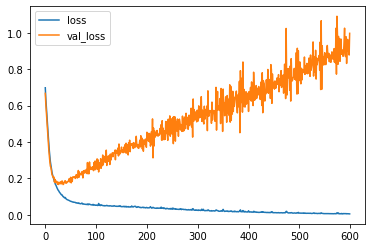

In [20]:
losses.plot()

In [21]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))


#BINARY CLASSIFICATION BECAUSE BENIGN CAN ONLY BE 0 OR 1
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
# help(EarlyStopping)

In [24]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [25]:
model.fit(x=X_train,y=y_train, epochs=600,
         validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6763 - val_loss: 0.6628
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6461 - val_loss: 0.6316
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6154 - val_loss: 0.5965
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5808 - val_loss: 0.5555
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5401 - val_loss: 0.5082
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4953 - val_loss: 0.4557
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4502 - val_loss: 0.4052
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4037 - val_loss: 0.3600
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3627 - val_loss: 0.3212
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3264 - val_loss: 0.2889
Epoch 11

<AxesSubplot:>

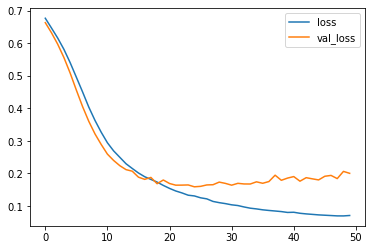

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [27]:
from tensorflow.keras.layers import Dropout

In [28]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION BECAUSE BENIGN CAN ONLY BE 0 OR 1
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
model.fit(x=X_train,y=y_train, epochs=600,
         validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7204 - val_loss: 0.6758
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6831 - val_loss: 0.6693
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6802 - val_loss: 0.6588
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6670 - val_loss: 0.6425
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6641 - val_loss: 0.6285
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6398 - val_loss: 0.6097
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6256 - val_loss: 0.5841
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6065 - val_loss: 0.5518
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5801 - val_loss: 0.5251
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5669 - val_loss: 0.5049
Epoch 11/

<AxesSubplot:>

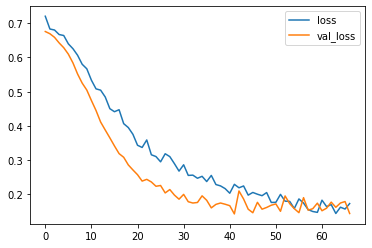

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [31]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.99      0.90      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



In [34]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 9 79]]
